In [ ]:
#Bar plot for representing the energetic contribution of residues within a 4.5 A cutoff distance of the ligand (using MMPBSA per residue decomposition analysis)

In [ ]:
# MIT License
# Copyright (c) 2025 Rodolfo Adrian Arriaga Rivera
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction.
# See the LICENSE file for full license text.

In [15]:
#Loading necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import os

In [29]:
#Setting working directory
os.chdir('/Volumes/ADATA HV 30/ifit1/cap2/37_C/37_C/mmpbsa_decomp')
print(os.getcwd())

/Volumes/ADATA HV 30/ifit1/cap2/37_C/37_C/mmpbsa_decomp


In [ ]:
#Loading the file in which the residues and its contributions are contained (tailored as needed for plotting, from a .dat file, containing a column titled "Residue", and another column "Avg.", and the residues from the Delta Averages)
data = pd.read_csv('.csv')
data.columns = data.columns.str.strip() # removes all blank spaces

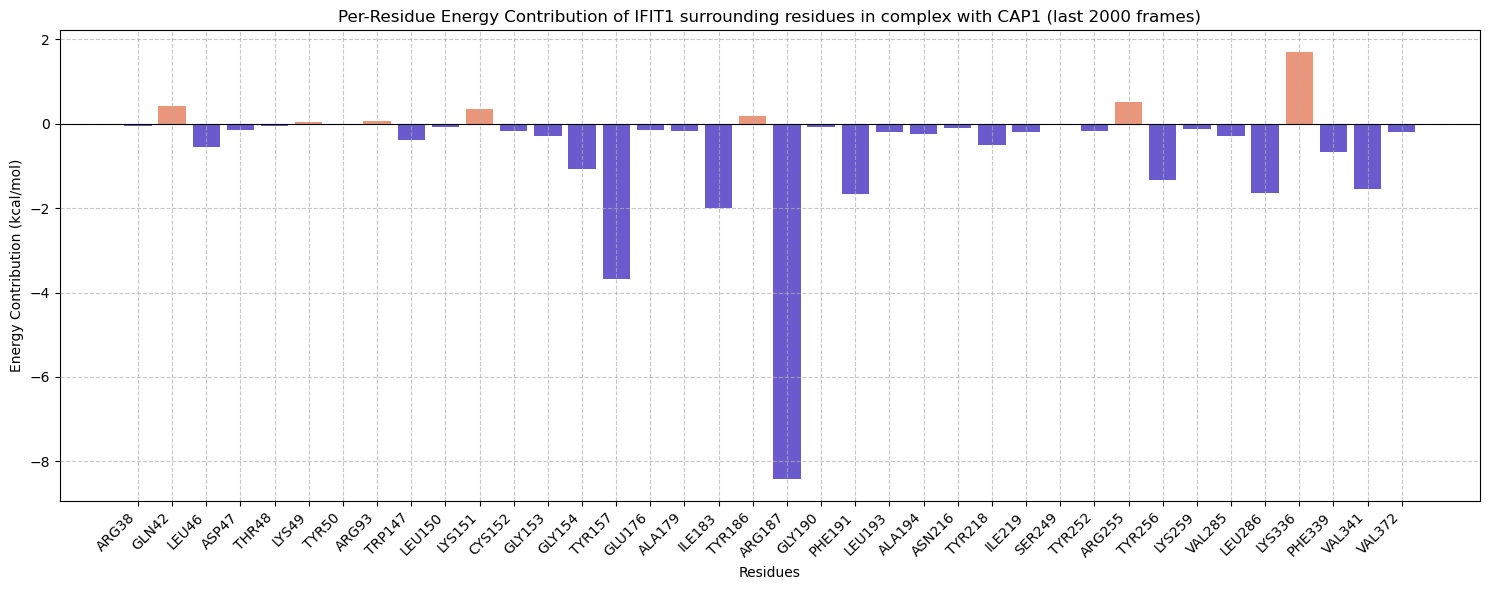

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,6))
rescolors = ['slateblue' if val < 0 else 'darksalmon' for val in data['Avg.']] #Changing color depending on energetic contribution
plt.bar(data['Residue'], data['Avg.'], color=rescolors) #Colors based on positive/negative values
plt.title('Per-Residue Energy Contribution of IFIT1 surrounding residues in complex with CAP2')
plt.xlabel('Residues')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Energy Contribution (kcal/mol)')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('.png')
plt.show()

In [ ]:
# Comparative bar plot across residues for the same protein

In [ ]:
#Needs to have all csv df in a single directory for plotting
os.chdir('/path/to/directory')
print(os.getcwd())

/Volumes/ADATA HV 30/ifit5/per_res_decomp_df


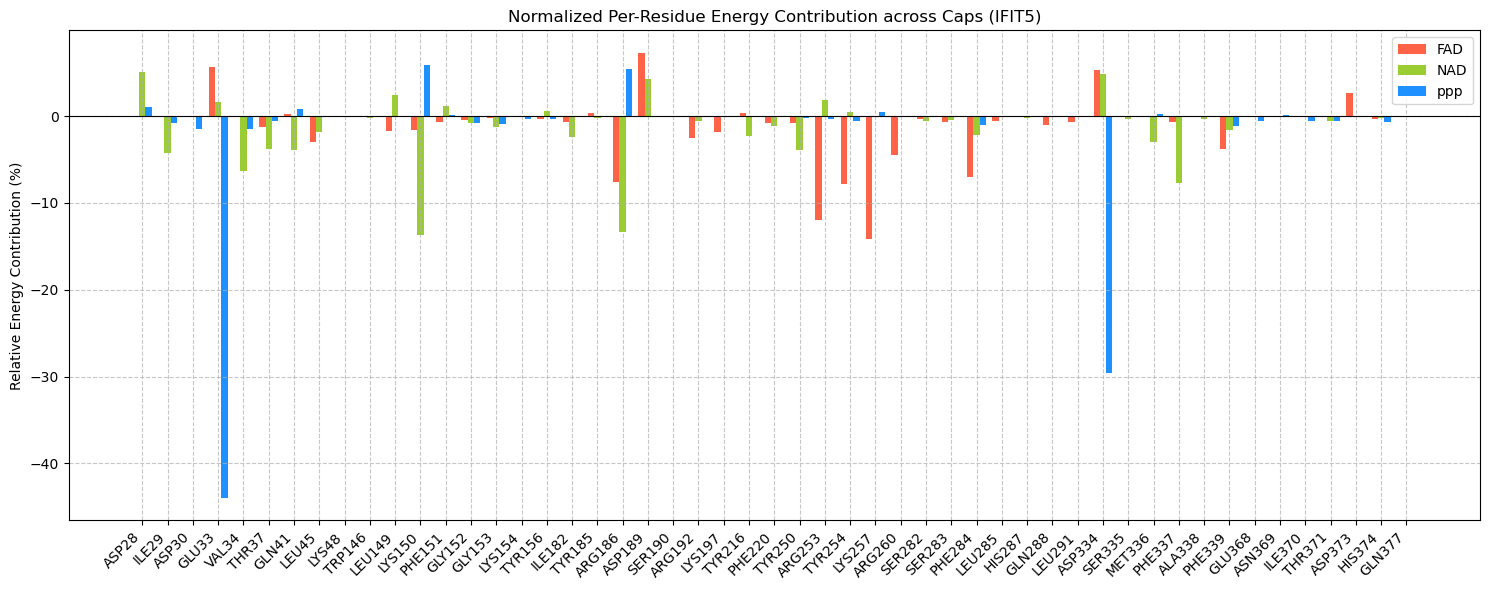

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load data of each ligand (tailored as to have a column "Residue" and another "Avg.")
ligand = pd.read_csv(".csv")

# Clean columns for spaces
ligand.columns = ligand.columns.str.strip()

# Rename columns for each cap
#ligand = ligand.rename(columns={"Avg.": "LIGAND_1"})

# Merge all on 'Residue' column
merged = ligand.merge(ligand, on="Residue", how="outer").merge(ligand2, on="Residue", how="outer")
merged = merged.fillna(0)

# Normalize each cap column: relative contribution %
for cap in ['ligand1', 'ligand2', 'ligand3']:
    total_energy = merged[cap].abs().sum()
    merged[cap + '_rel'] = merged[cap] / total_energy * 100
    
# Extract residue number for sorting
merged['ResNum'] = merged['Residue'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# Sort by residue number (increasing order)
merged = merged.sort_values(by='ResNum').reset_index(drop=True)

# Plot normalized contributions side by side
plt.figure(figsize=(15, 6))
caps = [ 'ligand1_rel', 'ligand2_rel', 'ligand3_rel']
colors = {'ligand1_rel': 'tomato', 'ligand2_rel': 'yellowgreen', 'ligand3_rel': 'dodgerblue'}
bar_width = 0.25
x = np.arange(len(merged['Residue']))

for i, cap in enumerate(caps):
    plt.bar(
        [val + bar_width * (i - 1) for val in x],
        merged[cap],
        width=bar_width,
        label=cap.replace('_rel', ''),
        color=colors[cap]
    )
    
#Plotting schematics
plt.xticks(ticks=x, labels=merged['Residue'], rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('Relative Energy Contribution (%)')
plt.title('Normalized Per-Residue Energy Contribution across ligands (Protein_name))')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(".png")
plt.show()

In [ ]:
#Top 5 contributors of each analyzed ligand

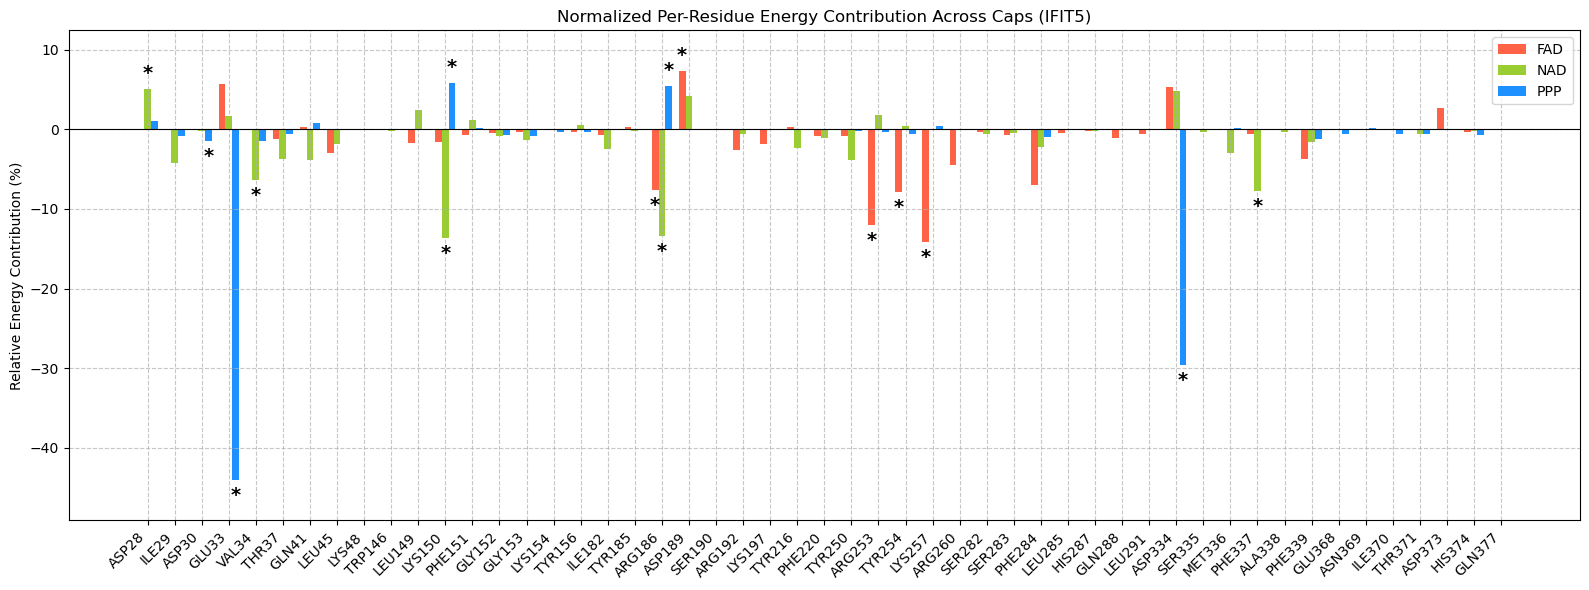

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume merged is already defined with columns: ligand1_rel, ligand2_rel, ligand3_rel, Residue

bar_width = 0.25
x = np.arange(len(merged))

fig, ax = plt.subplots(figsize=(16,6))

# Plot ligand1
bars_fad = ax.bar(
    x - bar_width,
    merged['ligand1_rel'],
    width=bar_width,
    label='LIGAND_1',
    color='tomato'
)

# Plot ligand_2
bars_nad = ax.bar(
    x,
    merged['ligand2_rel'],
    width=bar_width,
    label='LIGAND_2',
    color='yellowgreen'
)

# Plot ligand_3
bars_ppp = ax.bar(
    x + bar_width,
    merged['ligand_3_rel'],
    width=bar_width,
    label='LIGAND_3',
    color='dodgerblue'
)

# Identify top contributors
top_fad_idx = merged['ligand1_rel'].abs().nlargest(5).index
top_nad_idx = merged['ligand2_rel'].abs().nlargest(5).index
top_ppp_idx = merged['ligand3_rel'].abs().nlargest(5).index

# Compute overall y-limits with margin
all_vals = np.concatenate([
    merged['ligand1_rel'].values,
    merged['ligand2_rel'].values,
    merged['ligand3_rel'].values
])
ymax, ymin = all_vals.max(), all_vals.min()
margin = (ymax - ymin) * 0.1
ax.set_ylim(ymin - margin, ymax + margin)

# Annotate function
def annotate_top(bars, indices):
    for i in indices:
        rect = bars[i]
        x0 = rect.get_x() + rect.get_width() / 2
        y0 = rect.get_height()
        offset = margin * 0.15
        ax.text(
            x0, y0 + np.sign(y0) * offset, '*',
            ha='center', va='bottom' if y0 > 0 else 'top',
            fontsize=14, weight='bold', color='black'
        )

# Add asterisks
annotate_top(bars_fad, top_ligand1_idx)
annotate_top(bars_nad, top_ligand2_idx)
annotate_top(bars_ppp, top_ligand3_idx)

# Final formatting
ax.axhline(0, color='black', linewidth=0.8)
ax.set_xticks(x)
ax.set_xticklabels(merged['Residue'], rotation=45, ha='right')
ax.set_ylabel('Relative Energy Contribution (%)')
ax.set_title('Normalized Per-Residue Energy Contribution Across ligands (Protein_name)')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(".png")
plt.show()